In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

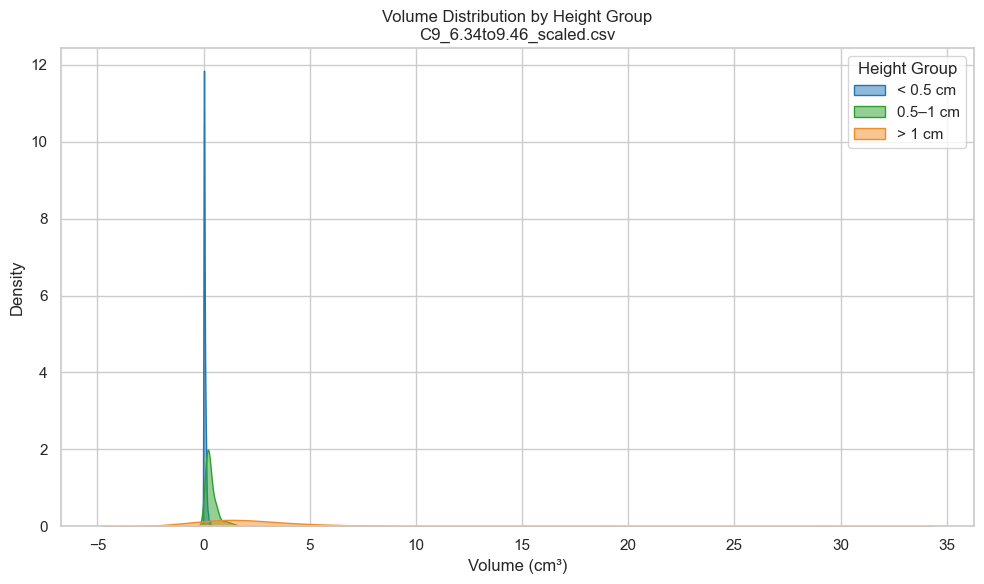

Plot saved to: G:\Official_Vanda_Organizing\Spatial_Morphologic_Data\2_Data_Cleaning\4_Pinnacle_Volumes\Height_Volume_DensityPlots\C9_6.34to9.46_scaled_volume_density.png


In [51]:
file_path = r"G:\Official_Vanda_Organizing\Spatial_Morphologic_Data\2_Data_Cleaning\4_Pinnacle_Volumes\C9_6.34to9.46_scaled.csv"  # <- Replace this with your file path

# Save directory
save_dir = r"G:\Official_Vanda_Organizing\Spatial_Morphologic_Data\2_Data_Cleaning\4_Pinnacle_Volumes\Height_Volume_DensityPlots"
os.makedirs(save_dir, exist_ok=True)  # Make sure the folder exists

# Read the data
df = pd.read_csv(file_path)

# Convert height to cm
df['Height_cm'] = df['Height_m'] * 100

# Categorize by height
def categorize_height(h):
    if h < 0.5:
        return "< 0.5 cm"
    elif h < 1:
        return "0.5–1 cm"
    else:
        return "> 1 cm"

df['Height_Group'] = df['Height_cm'].apply(categorize_height)

# Fixed color mapping
color_map = {
    "< 0.5 cm": "#1f77b4",   # blue
    "0.5–1 cm": "#2ca02c",   # green
    "> 1 cm": "#F28C28"    # red
}

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use fixed colors
for group in ["< 0.5 cm", "0.5–1 cm", "> 1 cm"]:
    subset = df[df['Height_Group'] == group]
    if not subset.empty:
        sns.kdeplot(
            data=subset,
            x="Volume_cm3",
            fill=True,
            alpha=0.5,
            label=group,
            color=color_map[group]
        )

plt.xlabel("Volume (cm³)")
plt.ylabel("Density")
plt.title(f"Volume Distribution by Height Group\n{os.path.basename(file_path)}")
plt.legend(title="Height Group")
plt.tight_layout()

# Save the plot
filename = os.path.basename(file_path).replace(".csv", "_volume_density.png")
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300)
plt.show()

print(f"Plot saved to: {save_path}")